In [1]:
import os
os.chdir('../..')

In [2]:
from platform import python_version

print(python_version())

3.7.9


In [3]:
import numpy as np
import pandas as pd
import json

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("whitegrid")

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [65]:
dataset = 'Chicago'

names = ['DATWGAN_22']

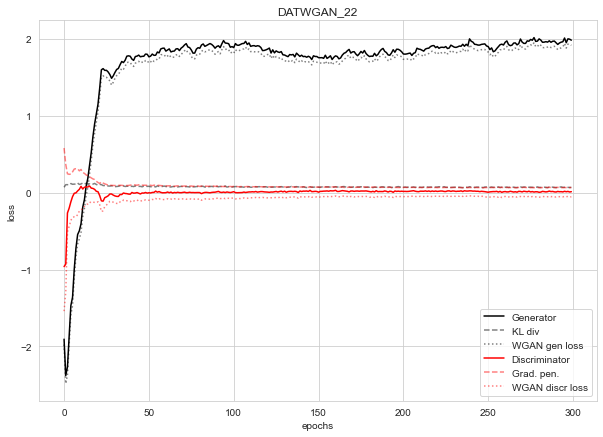

In [75]:
for n in names:
    
    output_folder = '../output/' + dataset + '/' + n + '/'

    with open(output_folder + 'logs/stats.json', 'r') as infile:
        data = json.load(infile)

    loss = {'gen': [],
            'discr': []
           }
    if 'WGAN' in n:
        loss['wgan_discr'] = []
        loss['grad_pen'] = []
        loss['kl'] = []
        loss['wgan_gen'] = []
        for d in data:
            loss['wgan_gen'].append(d['GAN_loss/g_loss'])
            loss['kl'].append(d['GAN_loss/kl_div'])
            loss['gen'].append(d['GAN_loss/g_loss']+d['GAN_loss/kl_div'])
            loss['wgan_discr'].append(d['GAN_loss/d_loss'])
            loss['grad_pen'].append(10*d['GAN_loss/gradient_penalty'])
            loss['discr'].append((d['GAN_loss/d_loss']+10*d['GAN_loss/gradient_penalty']))
    else:
        for d in data:
            loss['gen'].append(d['GAN_loss/gen/final-g-loss'])
            loss['discr'].append(d['GAN_loss/discrim/loss'])

    plt.figure(figsize=(10,7))
    if True:
        plt.plot(loss['gen'], 'k', label='Generator')
        if 'WGAN' in n:
            plt.plot(loss['kl'], 'k--', label='KL div', alpha=0.5)
            plt.plot(loss['wgan_gen'], 'k:', label='WGAN gen loss', alpha=0.5)
            
    plt.plot(loss['discr'], 'r', label='Discriminator')
    if 'WGAN' in n:
        plt.plot(loss['grad_pen'], 'r--', label='Grad. pen.', alpha=0.5)
        plt.plot(loss['wgan_discr'], 'r:', label='WGAN discr loss', alpha=0.5)
    plt.legend()

    plt.title(n)
    #plt.ylim([-.5,.5])
    plt.xlabel('epochs')
    plt.ylabel('loss')